In [110]:
import os
import cv2
import torch
import random
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from torchvision import transforms
from arch.unet import UNet20, UNet256
from torch.utils.data import Dataset, DataLoader
%matplotlib inline

In [116]:
class ICVGIPDataset(Dataset):
    def __init__(
        self,
        image_dir="data/leftImg8bit/train",
        labels_dir="data/gtFine/train",
        print_dataset=False,
        input_img_size=(388, 388),
        output_img_size=(388, 388),
    ):
        X = []
        y = []
        for root, directories, files in os.walk(image_dir, topdown=False):
            for name in files:
                X.append(os.path.join(root, name))

        for root, directories, files in os.walk(labels_dir, topdown=False):
            for name in files:
                if "_gtFine_labellevel3Ids.png" in name:
                    y.append(os.path.join(root, name))
        assert len(X) == len(y)
        X.sort()
        y.sort()
        self.samples = list(zip(X, y))
        del X, y
        if print_dataset:
            self.print_dataset()

        self.input_img_size = input_img_size
        self.output_img_size = output_img_size

    def __len__(self):
        return len(self.samples)

    def print_dataset(self):
        for X, y in self.samples:
            print(X, y)

    def __getitem__(self, index):
        image_path, label_path = self.samples[index]
        image = cv2.imread(image_path)
        image = cv2.resize(image, self.input_img_size, interpolation=cv2.INTER_NEAREST)

        image = torch.Tensor(image) / 255.0

        labels = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)
        labels = cv2.resize(labels, self.output_img_size, cv2.INTER_NEAREST)
        labels[np.where(labels > 26)] = 26

        labels = torch.Tensor(np.asarray(labels)).long()
#         image = self.transform(image / 255.0)
        return image, labels

    def transform(self, image):
        transform_ops = transforms.Compose(
            [
                transforms.Normalize(
                    mean=(0.485, 0.56, 0.406), std=(0.229, 0.224, 0.225)
                ),
            ]
        )
        return transform_ops(image)


def get_dataloader(
    image_dir="data/leftImg8bit/train",
    labels_dir="data/gtFine/train",
    print_dataset=False,
    batch_size=8,
    input_img_size=(388, 388),
    output_img_size=(388, 388),
):
    dataset = ICVGIPDataset(
        image_dir=image_dir,
        labels_dir=labels_dir,
        print_dataset=print_dataset,
        input_img_size=input_img_size,
        output_img_size=output_img_size,
    )
    dataloader = DataLoader(dataset, batch_size=batch_size)
    return dataloader



In [117]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device = torch.device(device)

In [118]:
train_img_dir = "data/leftImg8bit/train"
train_label_dir = "data/gtFine/train"
train_batch_size = 1

In [119]:
train_dataloader = get_dataloader(
    image_dir=train_img_dir,
    labels_dir=train_label_dir,
    batch_size=train_batch_size,
    print_dataset=True,
    input_img_size=(256, 256),
    output_img_size=(256, 256),
)

data/leftImg8bit/train/201/frame0029_leftImg8bit.jpg data/gtFine/train/201/frame0029_gtFine_labellevel3Ids.png
data/leftImg8bit/train/201/frame0299_leftImg8bit.jpg data/gtFine/train/201/frame0299_gtFine_labellevel3Ids.png
data/leftImg8bit/train/201/frame0779_leftImg8bit.jpg data/gtFine/train/201/frame0779_gtFine_labellevel3Ids.png
data/leftImg8bit/train/201/frame1019_leftImg8bit.jpg data/gtFine/train/201/frame1019_gtFine_labellevel3Ids.png
data/leftImg8bit/train/201/frame1469_leftImg8bit.jpg data/gtFine/train/201/frame1469_gtFine_labellevel3Ids.png
data/leftImg8bit/train/201/frame1979_leftImg8bit.jpg data/gtFine/train/201/frame1979_gtFine_labellevel3Ids.png
data/leftImg8bit/train/201/frame2519_leftImg8bit.jpg data/gtFine/train/201/frame2519_gtFine_labellevel3Ids.png
data/leftImg8bit/train/201/frame2819_leftImg8bit.jpg data/gtFine/train/201/frame2819_gtFine_labellevel3Ids.png
data/leftImg8bit/train/201/frame3179_leftImg8bit.jpg data/gtFine/train/201/frame3179_gtFine_labellevel3Ids.png
d

torch.Size([1, 256, 256, 3])
torch.Size([1, 3, 256, 256])


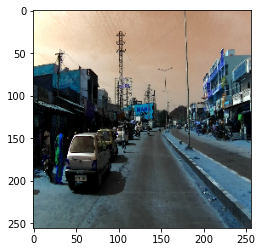

torch.Size([1, 256, 256, 3])
torch.Size([1, 3, 256, 256])


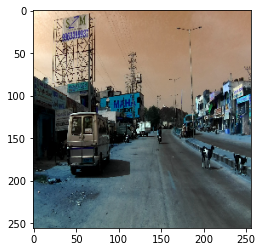

torch.Size([1, 256, 256, 3])
torch.Size([1, 3, 256, 256])


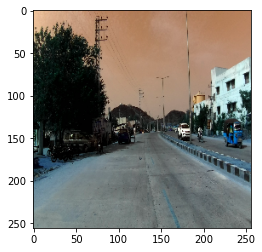

torch.Size([1, 256, 256, 3])
torch.Size([1, 3, 256, 256])


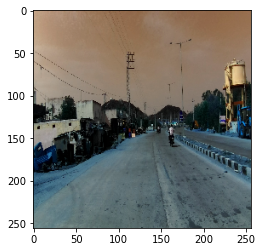

torch.Size([1, 256, 256, 3])
torch.Size([1, 3, 256, 256])


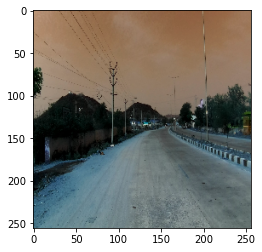

torch.Size([1, 256, 256, 3])
torch.Size([1, 3, 256, 256])


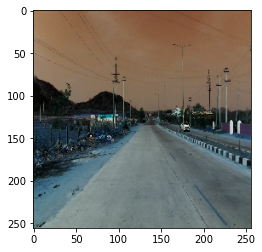

torch.Size([1, 256, 256, 3])
torch.Size([1, 3, 256, 256])


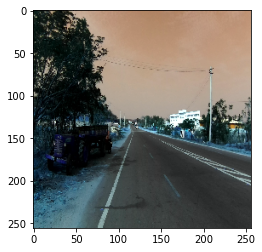

torch.Size([1, 256, 256, 3])
torch.Size([1, 3, 256, 256])


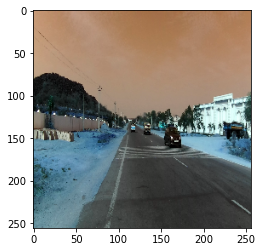

torch.Size([1, 256, 256, 3])
torch.Size([1, 3, 256, 256])


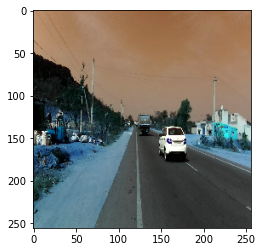

torch.Size([1, 256, 256, 3])
torch.Size([1, 3, 256, 256])


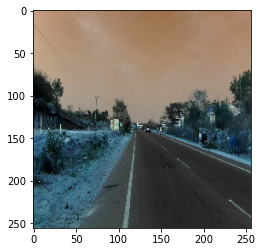

torch.Size([1, 256, 256, 3])
torch.Size([1, 3, 256, 256])


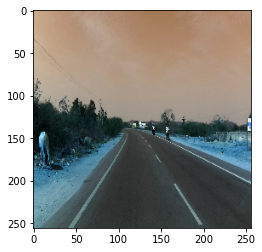

torch.Size([1, 256, 256, 3])
torch.Size([1, 3, 256, 256])


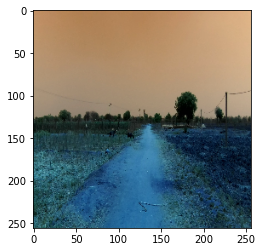

torch.Size([1, 256, 256, 3])
torch.Size([1, 3, 256, 256])


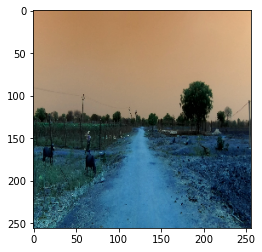

In [122]:
for X, y in train_dataloader:
    print(X.shape)
    X = X.permute(0, 3, 1, 2)
    print(X.shape)
    plt.imshow(X[0].permute(1, 2, 0))
    plt.show()